# Preparativos

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## input dados

1. Dados de venda
    - ID: identificador único de uma venda
    - ProductID: identificador único de um produto
    - ClientID: identificador único de um cliente
    - Discount: desconto aplicado em uma venda
    - UnitPrice: preço unitário de um produto vendido
    - Quantity: quantidade de produto vendido em uma venda
    - StoreID: identificador único de uma loja
    - Date: data de uma venda


2. Dados de consumidores
    - ID: identificador único de um consumidor
    - City: cidade/localidade onde um consumidor fez a compra
    - State: Unidade Federativa onde um consumidor fez a compra
    - DateOfBirth: data de nascimento de um consumidor
    - Sex: sexo de um consumidor



3. Dados de lojas
    - ID: identificador único de uma loja
    - Name: cidade/localidade de uma loja
    - State: Unidade Federativa de uma loja



4. Dados de produto
    - ID: identificador único de um produto
    - Name: nome de um produto
    - Size: tamanho de um produto

### Paht dos dados

In [2]:
root = os.path.join("Base_de_Dados")
path_venda = os.path.join(root, "Sheet1.csv")
path_produto = os.path.join(root, "Sheet2.csv")
path_consumidor = os.path.join(root, "Sheet3.csv")
path_loja = os.path.join(root, "Sheet4.csv")


#### Dados de Venda

In [3]:
df_venda = pd.read_csv(path_venda, skiprows=4)
df_venda.dropna(axis=1, how="all", inplace=True)
df_venda.head()


,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,12/10/2018
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,7/17/2019
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,4/10/2018
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,1/21/2019


#### Dados de Produto

In [4]:
df_produto = pd.read_csv(path_produto)
df_produto.head()


,ID,Name,Size
0,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
1,00066f42aeeb9f3007548bb9d3f33c382,Capitão América,M
2,00066f42aeeb9f3007548bb9d3f33c383,Capitão América,G
3,00088930e925c41fd95ebfe695fd26551,Thor,P
4,00088930e925c41fd95ebfe695fd26552,Thor,M


#### Dados de Consumidor

In [5]:
df_consumidor = pd.read_csv(path_consumidor)
df_consumidor.head()

,ID,City,State,DateOfBirth,Sex
0,14001,Curitiba,PR,6/28/1985,Homem
1,14002,Florianópolis,SC,1/10/1987,Homem
2,14003,Rio de Janeiro,RJ,11/5/1979,Homem
3,14004,Rio de Janeiro,RJ,11/25/1983,Mulher
4,14005,Florianópolis,SC,4/7/1969,Homem


#### Dados de loja

In [6]:
df_loja = pd.read_csv(path_loja)
df_loja.head()

,ID,Name,State
0,1,Florianópolis,SC
1,2,Rio de Janeiro,RJ
2,3,Porto Alegre,RS
3,4,Curitiba,PR
4,7,São Paulo,SP


# Questionario


## Alternativa 5
Quantos produtos únicos foram vendidos?


In [7]:
df_produto.ID.nunique()


73

## Alternativa 6
Qual o produto mais vendido e quantos desse produto foram vendidos?

In [8]:
map_protuct_ID_Name =  dict(zip(df_produto.ID, df_produto.Name + ", " + df_produto.Size))

In [9]:
df_venda["ProdutName"] = df_venda.ProductID.map(map_protuct_ID_Name)

In [10]:
df_num_vendas = df_venda.groupby(["ProductID", "ProdutName"]).sum()["Quantity"].reset_index().copy()
df_num_vendas.sort_values(by=["Quantity"], ascending=False).head()

,ProductID,ProdutName,Quantity
62,002ec297b1b00fb9dde7ee6ac24b67713,"Bazinga, G",1020
59,002d4ea7c04739c130bb74d7e7cd16943,"Iron Man, G",1018
8,0009406fd7479715e4bef61dd91f24623,"Deadpool, G",998
32,001c5d71ac6ad696d22315953758fa043,"Capitã Marvel, G",996
17,0011c512eb256aa0dbbb544d8dffcf6e3,"Flash, G",996


## Alternativa 7
Considerando o ano de 2019, qual gráfico abaixo mais se parece à quantidade mensal do vendida do produto "Iron Man, G" ? 

<AxesSubplot:xlabel='Date'>

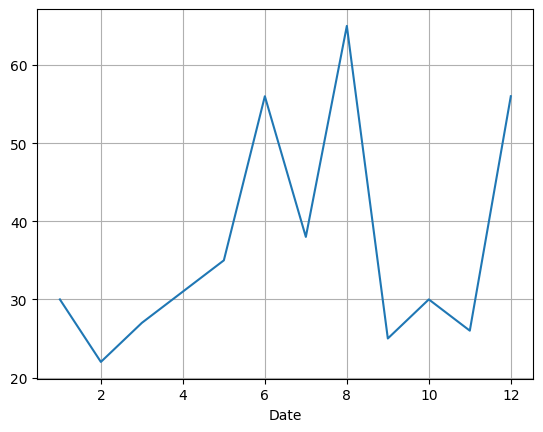

In [11]:
df_venda.Date = df_venda.Date.astype("datetime64[ns]")
df_venda.groupby(by=[df_venda.Date.dt.year, df_venda.Date.dt.month, "ProdutName"]).sum().loc[2019, :, "Iron Man, G",:].Quantity.plot(grid=True)

## Alternativa 8
Considerando a receita líquida mensal de vendas em 2019. Quais os valores de: média, mediana e desvio padrão desses valores? 

In [12]:
df_venda.UnitPrice = df_venda.UnitPrice.str.replace(",", ".").astype("float")

In [13]:
df_venda2019 = df_venda.groupby(by=[df_venda.Date.dt.year,df_venda.Date.dt.month,  "UnitPrice"]).sum().loc[2019,["Quantity"]]
df_venda2019.reset_index(inplace=True)
df_venda2019.rename(columns={"Date": "Month"}, inplace=True)

df_venda2019["Receita"] = df_venda2019.Quantity * df_venda2019.UnitPrice
df_venda2019.head()

,Month,UnitPrice,Quantity,Receita
0,1,114.8,39,4477.2
1,1,117.6,45,5292.0
2,1,134.4,44,5913.6
3,1,148.4,86,12762.4
4,1,156.8,44,6899.2


In [14]:
df_venda2019.groupby("Month").sum().Receita.describe()

count        12.000000
mean     324240.933333
std      105678.209798
min      187203.800000
25%      265072.150000
50%      285989.900000
75%      357271.950000
max      495861.800000
Name: Receita, dtype: float64

## Alternatia 9
Ainda considerando os dados de receita líquida de vendas em 2019, seu time deve focar esforços em uma das lojas para criar análises mais profundas e a primeira versão do modelo preditivo. Qual destas lojas você escolheria para prosseguir com o projeto? 

In [15]:
df_loja

,ID,Name,State
0,1,Florianópolis,SC
1,2,Rio de Janeiro,RJ
2,3,Porto Alegre,RS
3,4,Curitiba,PR
4,7,São Paulo,SP
5,9,Belo Horizonte,MG
6,22,Online,na


In [16]:
map_loja_ID_city =  dict(zip(df_loja.ID, df_loja.Name))

In [17]:
df_venda["StoreCity"] = df_venda.StoreID.map(map_loja_ID_city)
df_venda.StoreCity.value_counts()

Florianópolis     8230
Rio de Janeiro    6838
Porto Alegre      6167
Curitiba          5172
São Paulo         3588
Belo Horizonte    1845
Online             913
Name: StoreCity, dtype: int64